# **Handwritten  Digit Prediction**

**Dataset:**

The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine provided by MNIST. The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

**Target:**

Goal is to correctly identify digits from a dataset of tens of thousands of handwritten images.

**Approach:**

Applied Data Augmentation for better prediction and large dataset, followed by model training using Convolutional Neural Network.

# **Importing Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#convolutional layers
from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D
#core layers
from keras.layers import Dense, Dropout, Flatten

from keras.layers.normalization import BatchNormalization

from keras.preprocessing.image import ImageDataGenerator

from keras.utils.np_utils import to_categorical

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Data Preparation**

**Loading Data**

In [ ]:
train=pd.read_csv('/content/drive/My Drive/ML Projects datasets/MNIST/train.csv')
test=pd.read_csv('/content/drive/My Drive/ML Projects datasets/MNIST/test.csv')
sub = pd.read_csv('/content/drive/My Drive/ML Projects datasets/MNIST/sample_submission.csv')

In [ ]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train.shape

(42000, 785)

In [ ]:
test.shape

(28000, 784)

**Splitting data into features and labels**

In [ ]:
X=train.drop(['label'],1).values
y=train['label'].values
test_x=test.values

In [ ]:
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
print(y)

[1 0 1 ... 7 6 9]


In [ ]:
print(test_x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


**Normalization**

Performing grayscale normalization to reduce the effect of illumination's differences.

Moreover the CNN converg faster on [0..1] data than on [0..255]

In [ ]:
X=X/255
test_x=test_x/255

**Reshaping Data**

In [ ]:
# Reshaping image into 3 dimensions (height = 28px, width = 28px , canal = 1)
# canal = 1 => For gray scale
X=X.reshape(-1,28,28,1)
test_x=test_x.reshape(-1,28,28,1)

**Label Encoding**

One-Hot Encoding

Labels are 10 digits numbers from 0 to 9. We need to encode these lables to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0]).

In [ ]:
y=to_categorical(y)
print(y)

[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


**Splitting data into train and validation set**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=0)

Splitting the train set into two parts : a small fraction (10%) is the validation set used to evaluate the model and the rest (90%) is used to train the model.

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((37800, 28, 28, 1), (4200, 28, 28, 1), (37800, 10), (4200, 10))

In [ ]:
print(X_train)

[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.

# **Data Visualisation**

In [ ]:
X_train__ = X_train.reshape(X_train.shape[0],28,28)

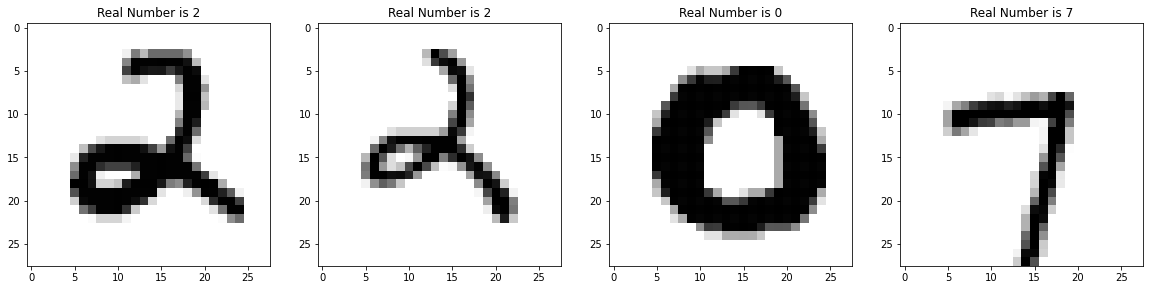

In [ ]:
fig,axis=plt.subplots(1,4,figsize=(20,10))
for i,ax in enumerate(axis.flat):
  ax.imshow(X_train__[i], cmap='binary')
  digit=y_train[i].argmax()
  ax.set(title=f"Real Number is {digit}");

Standardization

In [ ]:
#creating mean=0 and standard deviation=1
mean=np.mean(X_train)
std=np.std(X_train)
def standardize(x):
  return ((x-mean)/std)

In [ ]:
epochs=50 #for no of passes in training to optimize error
batch_size=64

# **Defining the model**

**CNN**

In [ ]:
model=Sequential()

#model.add(Lambda(standardize,input_shape=(28,28,1)))    
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())    
model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
    
model.add(MaxPooling2D(pool_size=(2,2)))
    
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512,activation="relu"))
    
model.add(Dense(10,activation="softmax"))
    
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# **Data Augumentation**

In [ ]:
#Data augmentation to prevent overfitting
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

#datagen.fit(X_train)
train_gen=datagen.flow(X_train, y_train, batch_size=batch_size)
test_gen=datagen.flow(X_test, y_test, batch_size=batch_size)
 

# **Model Training**

In [ ]:
#This make accuarcy 0.998
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.995):
      print("\nReached 99.5% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback() 
model.fit(X,y,batch_size=batch_size, validation_split=0.2, epochs=10,callbacks=[callbacks])

Epoch 1/10
525/525 [==============================] - 11s 22ms/step - loss: 0.1081 - accuracy: 0.9661 - val_loss: 0.0788 - val_accuracy: 0.9751
Epoch 2/10
525/525 [==============================] - 11s 21ms/step - loss: 0.0477 - accuracy: 0.9844 - val_loss: 0.0508 - val_accuracy: 0.9858
Epoch 3/10
525/525 [==============================] - 11s 21ms/step - loss: 0.0306 - accuracy: 0.9904 - val_loss: 0.0486 - val_accuracy: 0.9867
Epoch 4/10
525/525 [==============================] - 11s 20ms/step - loss: 0.0261 - accuracy: 0.9916 - val_loss: 0.0579 - val_accuracy: 0.9856
Epoch 5/10
525/525 [==============================] - 11s 20ms/step - loss: 0.0220 - accuracy: 0.9933 - val_loss: 0.0486 - val_accuracy: 0.9874
Epoch 6/10
525/525 [==============================] - 11s 20ms/step - loss: 0.0226 - accuracy: 0.9933 - val_loss: 0.0476 - val_accuracy: 0.9892
Epoch 7/10
525/525 [==============================] - 11s 20ms/step - loss: 0.0196 - accuracy: 0.9939 - val_loss: 0.0458 - val_accuracy:

In [ ]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.995):
      print("\nReached 99.5% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()      
# Fit the model
history = model.fit_generator(train_gen, 
                              epochs = epochs, 
                              steps_per_epoch = X_train.shape[0] // batch_size,
                              validation_data = test_gen,
                              validation_steps = X_test.shape[0] // batch_size,
                              callbacks=[callbacks],
                              )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
590/590 [==============================] - 23s 39ms/step - loss: 0.0831 - accuracy: 0.9777 - val_loss: 0.0379 - val_accuracy: 0.9873
Epoch 2/50
590/590 [==============================] - 22s 38ms/step - loss: 0.0404 - accuracy: 0.9876 - val_loss: 0.0317 - val_accuracy: 0.9882
Epoch 3/50
590/590 [==============================] - 23s 39ms/step - loss: 0.0328 - accuracy: 0.9900 - val_loss: 0.0317 - val_accuracy: 0.9887
Epoch 4/50
590/590 [==============================] - 23s 39ms/step - loss: 0.0333 - accuracy: 0.9898 - val_loss: 0.0468 - val_accuracy: 0.9846
Epoch 5/50
590/590 [==============================] - 23s 39ms/step - loss: 0.0305 - accuracy: 0.9907 - val_loss: 0.0359 - val_accuracy: 0.9887
Epoch 6/50
590/590 [==============================] - 23s 39ms/step - loss: 0.0265 - accuracy: 0.9918 - val_loss: 0.0293 - val_accuracy: 0.9911
Epoch 7/50
590/590 [==============================] - 23s 38

**Plotting CNN model**

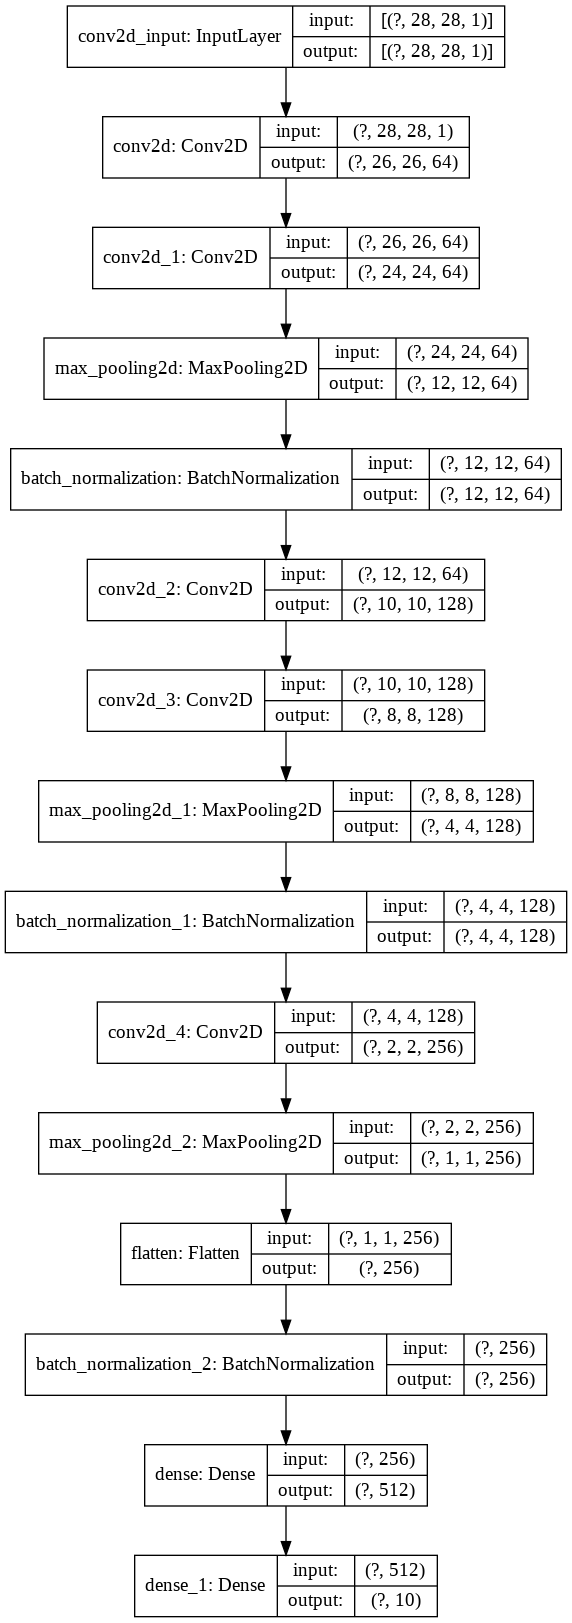

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


# **Evaluating the model**

**Training and validation curves**

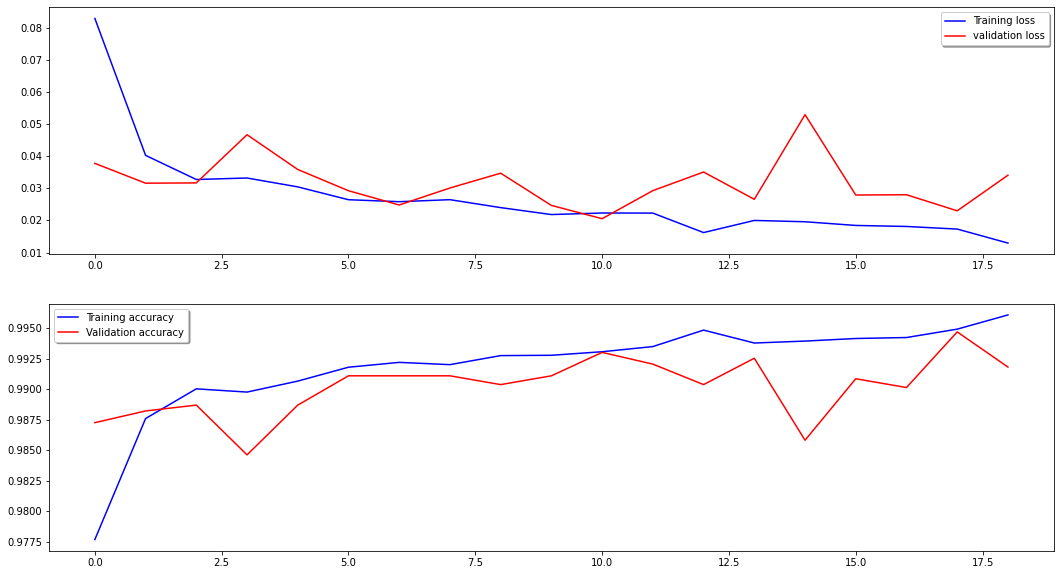

In [ ]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)


# **Confusion Matrix**

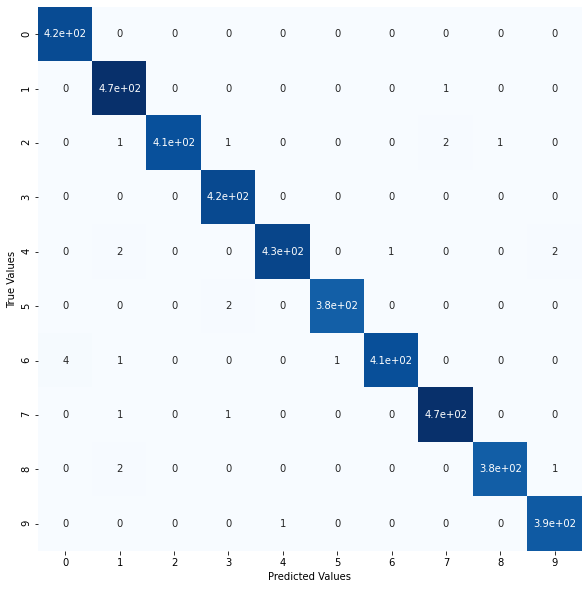

In [ ]:
fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = model.predict(X_test) # Predict encoded label as 2 => [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
Y_test = np.argmax(y_test, 1) # Decode labels

mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

# **Prediction and Submition**

**Prediction validation results**

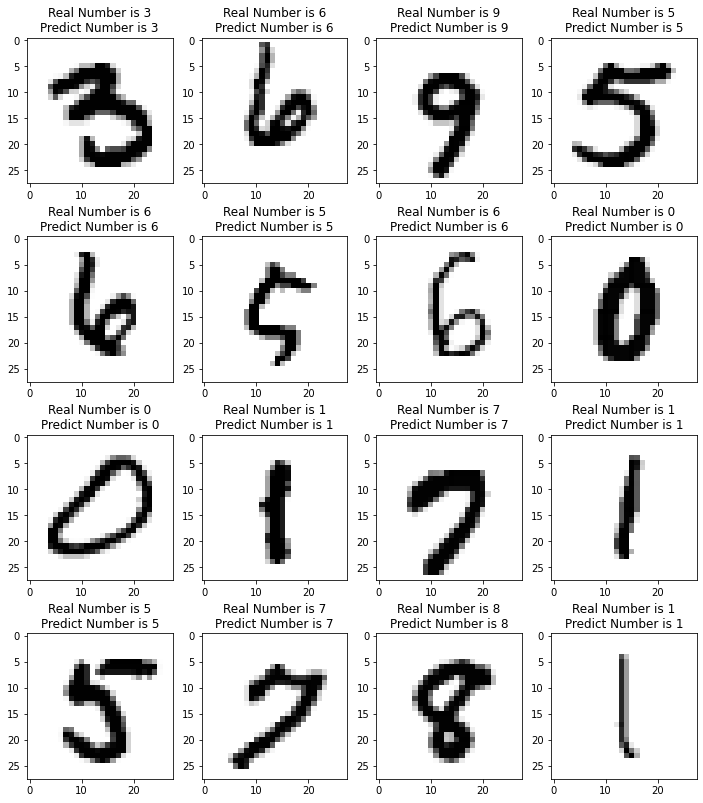

In [ ]:
y_pred = model.predict(X_test)
X_test__ = X_test.reshape(X_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Real Number is {y_test[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");


**Prediciting the Outputs**

In [ ]:
pred = model.predict_classes(test_x, verbose=1)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
875/875 [==============================] - 4s 4ms/step


In [ ]:
sub['Label'] = pred
sub.to_csv("CNN_keras_sub.csv", index=False)
sub.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


We have got 99.5 % accuracy using Convolution Neural network